In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('customer_acquisition_data.csv')

In [7]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [8]:
data['channel'].value_counts()

channel
email marketing     214
referral            207
paid advertising    194
social media        185
Name: count, dtype: int64

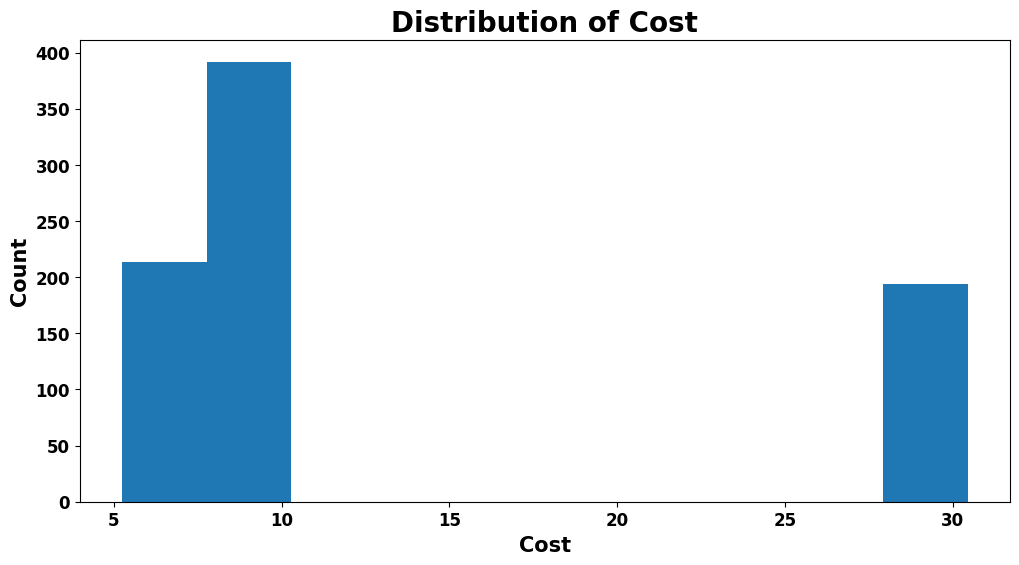

In [9]:
plt.subplots(figsize=(12,6))
plt.hist(data['cost'])
plt.title('Distribution of Cost', fontsize=20, fontweight='bold')
plt.xlabel('Cost', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.savefig('Distribution of Cost.png')
plt.show()

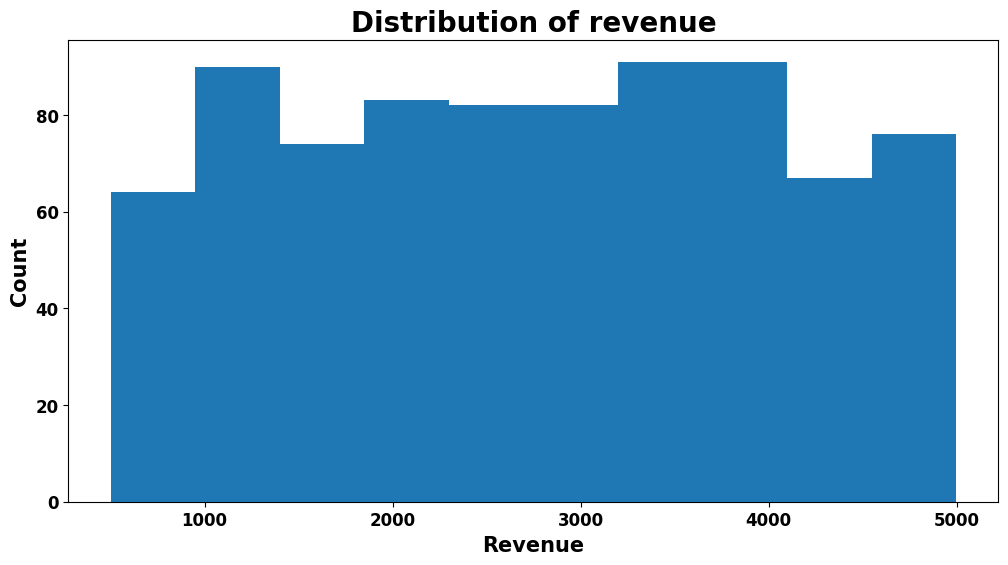

In [10]:
#Distribution of revenue
plt.subplots(figsize=(12,6))
plt.hist(data['revenue'])
plt.title('Distribution of revenue', fontsize=20, fontweight='bold')
plt.xlabel('Revenue', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.savefig('DistributionOfRevenue.png')
plt.show()

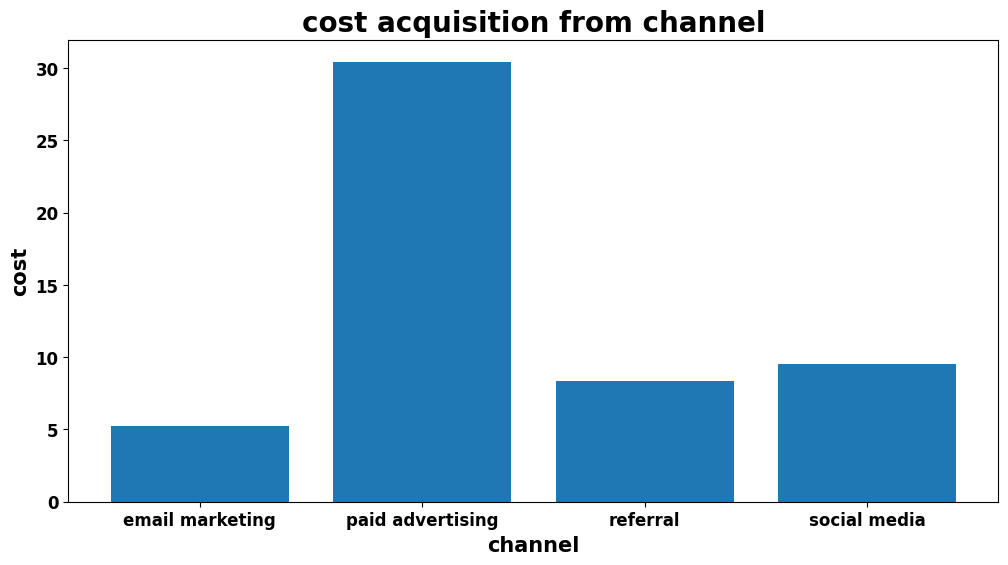

In [11]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()
plt.subplots(figsize=(12,6))
plt.bar(cost_by_channel['channel'], cost_by_channel['cost'])
plt.title('cost acquisition from channel', fontsize=20, fontweight='bold')
plt.xlabel('channel', fontsize=15, fontweight='bold')
plt.ylabel('cost', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.savefig('CostAcquisition.png')
plt.show()

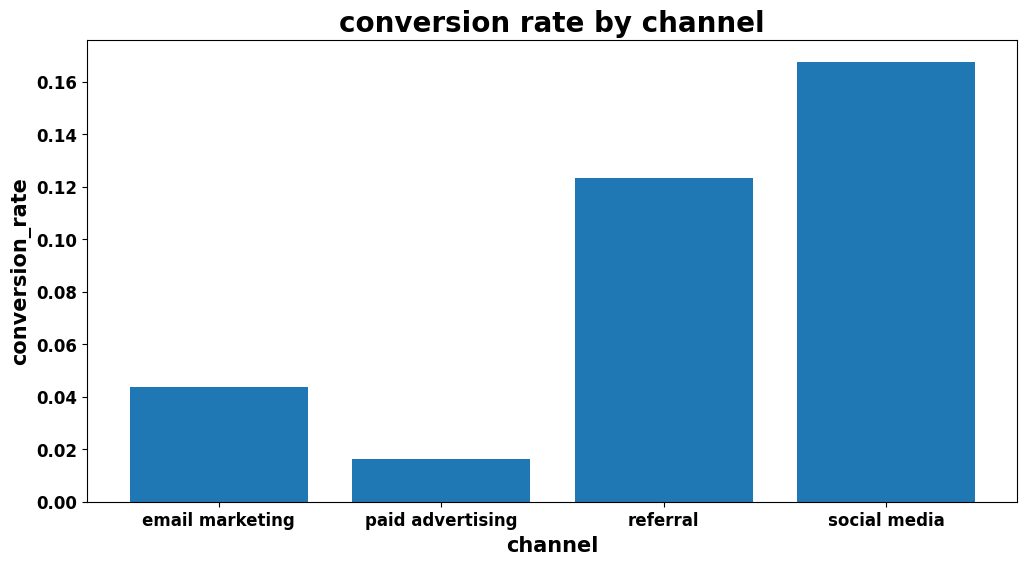

In [12]:
#conversion rate by channel
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()
plt.subplots(figsize=(12,6))
plt.bar(conversion_by_channel['channel'], conversion_by_channel['conversion_rate'])
plt.title('conversion rate by channel', fontsize=20, fontweight='bold')
plt.xlabel('channel', fontweight='bold', fontsize=15)
plt.ylabel('conversion_rate', fontweight='bold', fontsize=15)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.show()

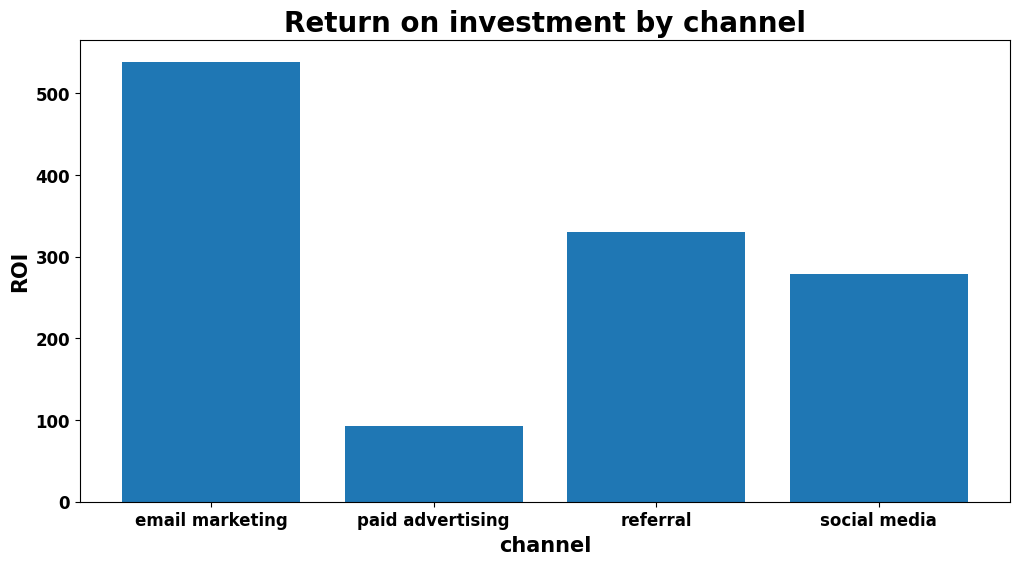

In [13]:
#return on investment for each channel
data['roi'] = data['revenue']/data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()
plt.subplots(figsize=(12,6))
plt.bar(roi_by_channel['channel'], roi_by_channel['roi'])
plt.title('Return on investment by channel', fontsize=20, fontweight='bold')
plt.xlabel('channel', fontsize=15, fontweight='bold')
plt.ylabel('ROI', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.savefig('ROI.png')
plt.show()

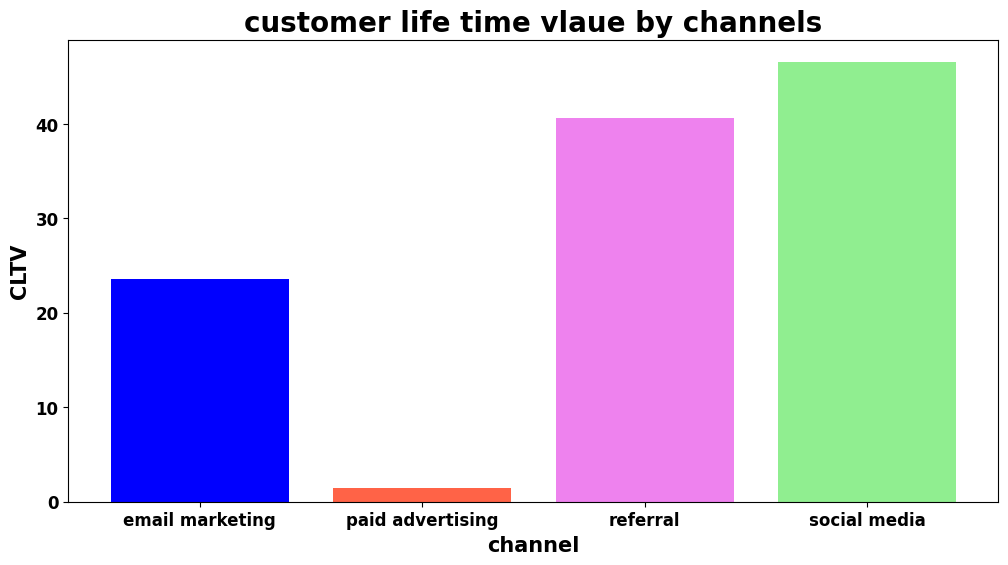

In [15]:
#customer life time value analysis
#(revenue-cost)*conversion_rate/cost
data['cltv'] = (data['revenue'] - data['cost'])*data['conversion_rate']/data['cost']
cltv = data.groupby('channel')['cltv'].mean().reset_index()
colors = ['blue', 'tomato', 'violet', 'lightgreen']
plt.subplots(figsize=(12,6))
plt.bar(cltv['channel'], cltv['cltv'], color=colors)
plt.title('customer life time vlaue by channels', fontsize=20, fontweight='bold')
plt.xlabel('channel', fontsize=15, fontweight='bold')
plt.ylabel('CLTV', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.savefig('CLTV.png')
plt.show()